In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob
import nltk
import tslearn
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
import timestring
import datetime

In [2]:
stock = pd.read_csv("Stockdata.csv", sep = ",")
news = pd.read_csv("WQD170084.csv", sep=",")
# silver = pd.read_csv("SilverDataUpdate.csv", sep=",")
# gas = pd.read_csv("GasDataUpdate.csv", sep=",")

alldata = pd.read_csv("alldata.csv")
alldata.head()



,date,gasprice,silverprice
0,2019-04-01,2.733,15.19
1,2019-04-02,2.722,15.09
2,2019-04-03,2.697,15.16
3,2019-04-04,2.685,15.15
4,2019-04-05,2.680,15.18


In [3]:
news["datenews"]= news["datenews"].apply(lambda x:timestring.Date(x).date)
news.head()

,datenews,list_of_company,title,content,news_links
0,2019-05-02 18:27:00,DIGI,KLCI tumbles 10.05 points as weaker ringgit da...,KUALA LUMPUR (May 2): The FBM KLCI had today c...,https://www.theedgemarkets.com/article/klci-tu...
1,2019-05-02 18:18:00,DIGI,Most SE Asian stocks drop as Fed dashes rate-c...,BENGALURU (May 2): Most Southeast Asian stock ...,https://www.theedgemarkets.com/article/most-se...
2,2019-05-02 12:59:00,DIGI,KLCI down 0.33% as select blue chips drag,KUALA LUMPUR (May 2): The FBM KLCI fell 0.33% ...,https://www.theedgemarkets.com/article/klci-do...
3,2019-05-02 10:25:00,DIGI,"KLCI tracks muted region, dips 0.14%",KUALA LUMPUR (May 2): The FBM KLCI dipped 0.14...,https://www.theedgemarkets.com/article/klci-tr...
4,2019-05-02 09:16:00,DIGI,KLCI drifts lower in line with regional markets,KUALA LUMPUR (May 2): The FBM KLCI tracked reg...,https://www.theedgemarkets.com/article/klci-dr...


In [4]:
news.shape

(951, 5)

In [5]:
news["titlepolarity"] = [TextBlob(news["title"].iloc[i]).polarity for i in range(0,news.shape[0])]

In [6]:
news["contentpolarity"] = [TextBlob(news["content"].iloc[i]).polarity for i in range(0,news.shape[0])]
news.head()

,datenews,list_of_company,title,content,news_links,titlepolarity,contentpolarity
0,2019-05-02 18:27:00,DIGI,KLCI tumbles 10.05 points as weaker ringgit da...,KUALA LUMPUR (May 2): The FBM KLCI had today c...,https://www.theedgemarkets.com/article/klci-tu...,0.000000,0.044275
1,2019-05-02 18:18:00,DIGI,Most SE Asian stocks drop as Fed dashes rate-c...,BENGALURU (May 2): Most Southeast Asian stock ...,https://www.theedgemarkets.com/article/most-se...,0.250000,0.154632
2,2019-05-02 12:59:00,DIGI,KLCI down 0.33% as select blue chips drag,KUALA LUMPUR (May 2): The FBM KLCI fell 0.33% ...,https://www.theedgemarkets.com/article/klci-do...,-0.085185,-0.015741
3,2019-05-02 10:25:00,DIGI,"KLCI tracks muted region, dips 0.14%",KUALA LUMPUR (May 2): The FBM KLCI dipped 0.14...,https://www.theedgemarkets.com/article/klci-tr...,0.000000,-0.060910
4,2019-05-02 09:16:00,DIGI,KLCI drifts lower in line with regional markets,KUALA LUMPUR (May 2): The FBM KLCI tracked reg...,https://www.theedgemarkets.com/article/klci-dr...,0.000000,0.081683


In [7]:
news['polarity'] = news[['titlepolarity','contentpolarity']].sum(axis=1)
news.head()

,datenews,list_of_company,title,content,news_links,titlepolarity,contentpolarity,polarity
0,2019-05-02 18:27:00,DIGI,KLCI tumbles 10.05 points as weaker ringgit da...,KUALA LUMPUR (May 2): The FBM KLCI had today c...,https://www.theedgemarkets.com/article/klci-tu...,0.000000,0.044275,0.044275
1,2019-05-02 18:18:00,DIGI,Most SE Asian stocks drop as Fed dashes rate-c...,BENGALURU (May 2): Most Southeast Asian stock ...,https://www.theedgemarkets.com/article/most-se...,0.250000,0.154632,0.404632
2,2019-05-02 12:59:00,DIGI,KLCI down 0.33% as select blue chips drag,KUALA LUMPUR (May 2): The FBM KLCI fell 0.33% ...,https://www.theedgemarkets.com/article/klci-do...,-0.085185,-0.015741,-0.100926
3,2019-05-02 10:25:00,DIGI,"KLCI tracks muted region, dips 0.14%",KUALA LUMPUR (May 2): The FBM KLCI dipped 0.14...,https://www.theedgemarkets.com/article/klci-tr...,0.000000,-0.060910,-0.060910
4,2019-05-02 09:16:00,DIGI,KLCI drifts lower in line with regional markets,KUALA LUMPUR (May 2): The FBM KLCI tracked reg...,https://www.theedgemarkets.com/article/klci-dr...,0.000000,0.081683,0.081683


In [8]:
DIGI_news = news


In [9]:
DIGI_news = DIGI_news.iloc[np.where(news["list_of_company"]=="DIGI")]
DIGI_news

,datenews,list_of_company,title,content,news_links,titlepolarity,contentpolarity,polarity
0,2019-05-02 18:27:00,DIGI,KLCI tumbles 10.05 points as weaker ringgit da...,KUALA LUMPUR (May 2): The FBM KLCI had today c...,https://www.theedgemarkets.com/article/klci-tu...,0.000000,0.044275,0.044275
1,2019-05-02 18:18:00,DIGI,Most SE Asian stocks drop as Fed dashes rate-c...,BENGALURU (May 2): Most Southeast Asian stock ...,https://www.theedgemarkets.com/article/most-se...,0.250000,0.154632,0.404632
2,2019-05-02 12:59:00,DIGI,KLCI down 0.33% as select blue chips drag,KUALA LUMPUR (May 2): The FBM KLCI fell 0.33% ...,https://www.theedgemarkets.com/article/klci-do...,-0.085185,-0.015741,-0.100926
3,2019-05-02 10:25:00,DIGI,"KLCI tracks muted region, dips 0.14%",KUALA LUMPUR (May 2): The FBM KLCI dipped 0.14...,https://www.theedgemarkets.com/article/klci-tr...,0.000000,-0.060910,-0.060910
4,2019-05-02 09:16:00,DIGI,KLCI drifts lower in line with regional markets,KUALA LUMPUR (May 2): The FBM KLCI tracked reg...,https://www.theedgemarkets.com/article/klci-dr...,0.000000,0.081683,0.081683
5,2019-05-02 09:02:00,DIGI,U Mobile eyes maiden profit in 2020,"KUALA LUMPUR: U Mobile Sdn Bhd, the country’s ...",https://www.theedgemarkets.com/article/u-mobil...,0.000000,-0.029959,-0.029959
6,2019-04-30 18:17:00,DIGI,"KLCI bucks Asia stock decline as HLFG, Maybank...",KUALA LUMPUR (April 30): The FBM KLCI gained 4...,https://www.theedgemarkets.com/article/klci-bu...,0.000000,-0.028819,-0.028819
7,2019-04-24 11:17:00,DIGI,DiGi 1Q results in line on margin expansion,"DiGi.Com Bhd\n(April 23, RM4.49)\nMaintain hol...",https://www.theedgemarkets.com/article/digi-1q...,0.000000,0.060000,0.060000
8,2019-04-24 08:27:00,DIGI,"CIMB Research downgrades DiGi, lowers target p...",KUALA LUMPUR (April 24): CIMB Research has dow...,https://www.theedgemarkets.com/article/cimb-re...,0.000000,0.041667,0.041667
9,2019-04-23 10:42:00,DIGI,"DiGi kicks off 2019 on a lower note, pays 4.3 ...",KUALA LUMPUR: DiGi.com Bhd’s first-quarter net...,https://www.theedgemarkets.com/article/digi-ki...,0.000000,-0.009722,-0.009722


In [10]:
DIGI_news['datenews']=DIGI_news['datenews'].apply(lambda x:timestring.Date(x).date)


/home/amir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
DIGI_news.head()

,datenews,list_of_company,title,content,news_links,titlepolarity,contentpolarity,polarity
0,2019-05-02 18:27:00,DIGI,KLCI tumbles 10.05 points as weaker ringgit da...,KUALA LUMPUR (May 2): The FBM KLCI had today c...,https://www.theedgemarkets.com/article/klci-tu...,0.000000,0.044275,0.044275
1,2019-05-02 18:18:00,DIGI,Most SE Asian stocks drop as Fed dashes rate-c...,BENGALURU (May 2): Most Southeast Asian stock ...,https://www.theedgemarkets.com/article/most-se...,0.250000,0.154632,0.404632
2,2019-05-02 12:59:00,DIGI,KLCI down 0.33% as select blue chips drag,KUALA LUMPUR (May 2): The FBM KLCI fell 0.33% ...,https://www.theedgemarkets.com/article/klci-do...,-0.085185,-0.015741,-0.100926
3,2019-05-02 10:25:00,DIGI,"KLCI tracks muted region, dips 0.14%",KUALA LUMPUR (May 2): The FBM KLCI dipped 0.14...,https://www.theedgemarkets.com/article/klci-tr...,0.000000,-0.060910,-0.060910
4,2019-05-02 09:16:00,DIGI,KLCI drifts lower in line with regional markets,KUALA LUMPUR (May 2): The FBM KLCI tracked reg...,https://www.theedgemarkets.com/article/klci-dr...,0.000000,0.081683,0.081683


In [12]:
DIGI_news.index = pd.to_datetime(DIGI_news["datenews"])
DIGI_news.loc[:'2019-04-01']

,datenews,list_of_company,title,content,news_links,titlepolarity,contentpolarity,polarity
datenews,,,,,,,,
2019-03-21 10:00:00,2019-03-21 10:00:00,DIGI,DiGi working with regulators for 5G pilots and...,KUALA LUMPUR: Not to be left behind in the rac...,https://www.theedgemarkets.com/article/digi-wo...,0.000000,0.105536,0.105536
2019-03-20 17:49:00,2019-03-20 17:49:00,DIGI,DiGi working with regulators for 5G pilots and...,KUALA LUMPUR (March 20): Not to be left behind...,https://www.theedgemarkets.com/article/digi-wo...,0.000000,0.105536,0.105536
2019-03-18 07:00:00,2019-03-18 07:00:00,DIGI,Building trust is not just the CEO’s job,"For businesses and corporates, trust is a powe...",https://www.theedgemarkets.com/article/buildin...,0.000000,0.140551,0.140551
2019-03-15 17:27:00,2019-03-15 17:27:00,DIGI,PM's Dept: If Tabung Haji practices prudent ac...,KUALA LUMPUR (March 15): The non-performing as...,https://www.theedgemarkets.com/article/pms-dep...,0.000000,0.045960,0.045960
2019-03-14 23:15:00,2019-03-14 23:15:00,DIGI,MCMC internet centres get good community response,KUALA LUMPUR (March 14): A new digital learnin...,https://www.theedgemarkets.com/article/mcmc-in...,0.700000,0.191259,0.891259
2019-03-14 09:10:00,2019-03-14 09:10:00,DIGI,KLCI drifts lower in line with regional pause,KUALA LUMPUR (March 14): The FBM KLCI drifted ...,https://www.theedgemarkets.com/article/klci-dr...,0.000000,0.052946,0.052946
2019-03-07 10:56:00,2019-03-07 10:56:00,DIGI,Mixed results for telco sector amid moderating...,Telecommunications sector\nMaintain neutral on...,https://www.theedgemarkets.com/article/mixed-r...,0.000000,-0.007760,-0.007760
2019-03-04 15:00:00,2019-03-04 15:00:00,DIGI,The State of the Nation: EPF beats expectation...,IT would seem that the Employees Provident Fun...,https://www.theedgemarkets.com/article/state-n...,0.000000,0.059878,0.059878
2019-02-11 15:00:00,2019-02-11 15:00:00,DIGI,"EPF dividend of 5% possible, 6% may be difficult",THE Employees Provident Fund (EPF) is set to d...,https://www.theedgemarkets.com/article/epf-div...,-0.250000,-0.011798,-0.261798


In [13]:
DIGI_news1 = DIGI_news.loc["2019-04-01":"2019-04-30"].resample("B").sum()
DIGI_news1

,titlepolarity,contentpolarity,polarity
datenews,,,
2019-04-03,0.000000,0.308854,0.308854
2019-04-04,0.000000,0.000000,0.000000
2019-04-05,0.240000,0.149375,0.389375
2019-04-08,0.000000,0.000000,0.000000
2019-04-09,0.409091,0.228788,0.637879
2019-04-10,-0.150000,-0.016667,-0.166667
2019-04-11,0.000000,0.348139,0.348139
2019-04-12,0.450000,0.231267,0.681267
2019-04-15,1.500000,0.278498,1.778498


In [14]:
DIGI_stock = stock.loc[np.where(stock["companyname"]=="DIGI")]
DIGI_stock

,Id,stockdate,sector,subsector,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume,created_at
5377,5378,2019-04-01 16:00:00,main_market,telco_media,DIGI,6947,4.56,4.66,4.56,4.61,1616800,2019-04-30 17:28:07
5378,5379,2019-04-02 16:00:00,main_market,telco_media,DIGI,6947,4.66,4.66,4.61,4.64,1228800,2019-04-30 17:28:07
5379,5380,2019-04-03 16:00:00,main_market,telco_media,DIGI,6947,4.65,4.69,4.63,4.69,8204900,2019-04-30 17:28:07
5380,5381,2019-04-04 16:00:00,main_market,telco_media,DIGI,6947,4.70,4.70,4.67,4.70,2471800,2019-04-30 17:28:07
5381,5382,2019-04-07 16:00:00,main_market,telco_media,DIGI,6947,4.70,4.72,4.69,4.70,5226200,2019-04-30 17:28:07
5382,5383,2019-04-08 16:00:00,main_market,telco_media,DIGI,6947,4.72,4.72,4.65,4.69,1807300,2019-04-30 17:28:07
5383,5384,2019-04-09 16:00:00,main_market,telco_media,DIGI,6947,4.68,4.71,4.67,4.69,3178800,2019-04-30 17:28:07
5384,5385,2019-04-10 16:00:00,main_market,telco_media,DIGI,6947,4.69,4.71,4.68,4.69,1984000,2019-04-30 17:28:07
5385,5386,2019-04-11 16:00:00,main_market,telco_media,DIGI,6947,4.68,4.72,4.67,4.72,2092600,2019-04-30 17:28:07
5386,5387,2019-04-14 16:00:00,main_market,telco_media,DIGI,6947,4.72,4.74,4.70,4.72,4326100,2019-04-30 17:28:07


In [15]:
DIGI_stock["stockdate"] = DIGI_stock["stockdate"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
DIGI_stock.head()

,Id,stockdate,sector,subsector,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume,created_at
5377,5378,2019-04-01,main_market,telco_media,DIGI,6947,4.56,4.66,4.56,4.61,1616800,2019-04-30 17:28:07
5378,5379,2019-04-02,main_market,telco_media,DIGI,6947,4.66,4.66,4.61,4.64,1228800,2019-04-30 17:28:07
5379,5380,2019-04-03,main_market,telco_media,DIGI,6947,4.65,4.69,4.63,4.69,8204900,2019-04-30 17:28:07
5380,5381,2019-04-04,main_market,telco_media,DIGI,6947,4.70,4.70,4.67,4.70,2471800,2019-04-30 17:28:07
5381,5382,2019-04-07,main_market,telco_media,DIGI,6947,4.70,4.72,4.69,4.70,5226200,2019-04-30 17:28:07


In [16]:
DIGI_stock.index = pd.to_datetime(DIGI_stock["stockdate"])
DIGI_stock.loc['2019-04-01':]

,Id,stockdate,sector,subsector,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume,created_at
stockdate,,,,,,,,,,,,
2019-04-01,5378,2019-04-01,main_market,telco_media,DIGI,6947,4.56,4.66,4.56,4.61,1616800,2019-04-30 17:28:07
2019-04-02,5379,2019-04-02,main_market,telco_media,DIGI,6947,4.66,4.66,4.61,4.64,1228800,2019-04-30 17:28:07
2019-04-03,5380,2019-04-03,main_market,telco_media,DIGI,6947,4.65,4.69,4.63,4.69,8204900,2019-04-30 17:28:07
2019-04-04,5381,2019-04-04,main_market,telco_media,DIGI,6947,4.70,4.70,4.67,4.70,2471800,2019-04-30 17:28:07
2019-04-07,5382,2019-04-07,main_market,telco_media,DIGI,6947,4.70,4.72,4.69,4.70,5226200,2019-04-30 17:28:07
2019-04-08,5383,2019-04-08,main_market,telco_media,DIGI,6947,4.72,4.72,4.65,4.69,1807300,2019-04-30 17:28:07
2019-04-09,5384,2019-04-09,main_market,telco_media,DIGI,6947,4.68,4.71,4.67,4.69,3178800,2019-04-30 17:28:07
2019-04-10,5385,2019-04-10,main_market,telco_media,DIGI,6947,4.69,4.71,4.68,4.69,1984000,2019-04-30 17:28:07
2019-04-11,5386,2019-04-11,main_market,telco_media,DIGI,6947,4.68,4.72,4.67,4.72,2092600,2019-04-30 17:28:07


In [18]:
alldata.index = pd.to_datetime(alldata["date"])

In [ ]:
DIGI_news

In [19]:
DIGI = pd.concat([DIGI_stock["lastprice"],alldata["gasprice"],alldata["silverprice"],DIGI_news1["contentpolarity"]]
                      , keys = ["stockprice","GasPrice","SilverPrice","newspolarity"], axis = 1).ffill().bfill()


In [20]:
alldata

,date,gasprice,silverprice
date,,,
2019-04-01,2019-04-01,2.733,15.190
2019-04-02,2019-04-02,2.722,15.090
2019-04-03,2019-04-03,2.697,15.160
2019-04-04,2019-04-04,2.685,15.150
2019-04-05,2019-04-05,2.680,15.180
2019-04-07,2019-04-07,2.680,15.107
2019-04-08,2019-04-08,2.721,15.275
2019-04-09,2019-04-09,2.725,15.310
2019-04-10,2019-04-10,2.729,15.265


/home/amir/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


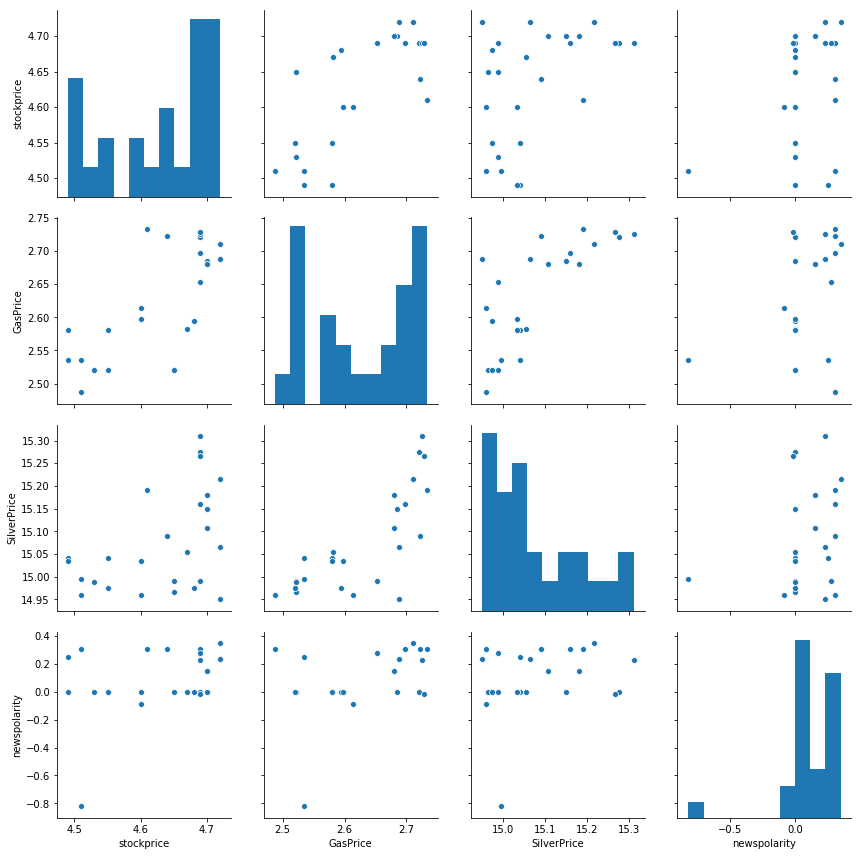

In [21]:
sns.pairplot(DIGI, size =3)

In [22]:
cov_mat = DIGI.cov()
cov_mat

,stockprice,GasPrice,SilverPrice,newspolarity
stockprice,0.006194,0.004638,0.003959,0.006532
GasPrice,0.004638,0.006729,0.006849,0.007834
SilverPrice,0.003959,0.006849,0.011921,0.006491
newspolarity,0.006532,0.007834,0.006491,0.053756


In [23]:
corr_mat= DIGI.corr()
corr_mat

,stockprice,GasPrice,SilverPrice,newspolarity
stockprice,1.000000,0.718431,0.460681,0.357979
GasPrice,0.718431,1.000000,0.764683,0.411907
SilverPrice,0.460681,0.764683,1.000000,0.256428
newspolarity,0.357979,0.411907,0.256428,1.000000


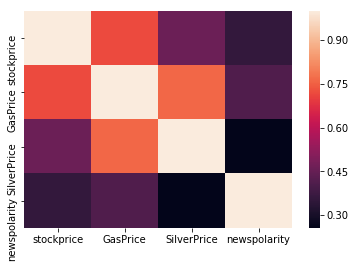

In [24]:
sns.heatmap(corr_mat)

In [ ]:
sns.boxplot(DIGI)

In [ ]:
DIGI

In [ ]:
DIGI.to_csv("DIGI.csv")